# **Proyek Analisis Data: Bike Sharing**
* Nama: Vittorio Fiorentino
* Email: vittoriofiorentino77@gmail.com
* ID Dicoding: a541ybm493

##Menentukan Pertanyaan:
- Analisa Waktu
1. Bagaimana tren jumlah peminjaman sepeda harian dari tahun 2011 ke 2012?

2. Pada jam berapa aktivitas peminjaman sepeda mencapai puncaknya?

##Import Semua Package / Library yang digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Wrangling

###Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

new_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="instant",
    right_on="instant"
)

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###Assessing Data

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kolom dteday harusnya merupakan tipe data datetime, bukan object

In [7]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Disini ada keanehan pada hum yang memiliki angka 0. Karena jika angka 0 berarti udara benar-benar kering. Hal ini sangat aneh untuk terjadi.

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kolom dteday harusnya merupakan tipe data datetime, bukan object

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Disini ada keanehan pada hum yang memiliki angka 0. Karena jika angka 0 berarti udara benar-benar kering. Hal ini sangat aneh untuk terjadi. Hanya saja jika melihat kolom lain terdapat angka 0 juga, bisa jadi ini aman saja.

Kesimpulan:
- Day_df bermasalah di tipe data dan inacurate value pada hum yang berangka 0
- hour_df bermasalah di tipe data dan inacurate value pada hum yang berangka 0, meskipun ada beberapa kolom yang berangka 0 tapi itu harusnya hal yang wajar

###Cleaning Data

In [12]:
dteday_columns = ["dteday"]

for column in dteday_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
mean_hum = day_df[day_df['hum'] != 0]['hum'].mean()
day_df['hum'] = day_df['hum'].replace(0, mean_hum)

In [16]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [17]:
mean_hum = hour_df[hour_df['hum'] != 0]['hum'].mean()
hour_df['hum'] = hour_df['hum'].replace(0, mean_hum)

In [18]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628024,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


Sekarang data telah dibersihkan dan siap untuk di analisis.

##Exploratory Data Analysis

Insight:
- Melihat tren jumlah peminjaman sepeda harian dari tahun 2011 ke 2012

- Menganalisa waktu puncak saat aktivitas peminjaman sepeda

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628754,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


Karena ingin melihat tren jumlah peminjaman sepeda harian dari tahun 2011 ke 2012, kita fokus pada kolom:
- dteday: tanggal
- cnt: total peminjaman per hari
- yr: tahun (0 = 2011, 1 = 2012)

Untuk memperoleh lebih banyak informasi terkait kedua data tersebut, kita perlu menggabungkan keduanya melalui proses join atau merge

In [20]:
# Pilih kolom dari day_df yang unik atau berguna untuk digabung
cols_to_add = ['dteday', 'casual', 'registered', 'cnt']  # versi harian
day_df_subset = day_df[cols_to_add]

# Merge berdasarkan 'dteday'
merged_df = hour_df.merge(day_df_subset, on='dteday', suffixes=('_hour', '_day'))

# Tampilkan beberapa baris pertama hasil gabungan
merged_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual_hour,registered_hour,cnt_hour,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,331,654,985


Untuk melihat apakah peminjaman lebih tinggi di akhir pekan atau hari kerja:

In [21]:
merged_df.groupby('weekday')['cnt_hour'].mean()


,cnt_hour
weekday,
0,177.468825
1,183.744655
2,191.238891
3,191.130505
4,196.436665
5,196.135907
6,190.209793


Rata-rata Peminjaman per Jam untuk Setiap Hari dalam Seminggu

In [22]:
pivot_hour_weekday = merged_df.pivot_table(
    values='cnt_hour',
    index='hr',
    columns='weekday',
    aggfunc='mean'
)
pivot_hour_weekday

weekday,0,1,2,3,4,5,6
hr,,,,,,,
0,93.990385,34.009524,27.623762,34.557692,39.271845,52.432692,94.304762
1,77.432692,17.307692,12.540000,15.336538,17.223301,24.721154,67.780952
2,61.627451,10.313131,6.801980,7.813725,9.156863,12.740385,50.495238
3,31.144231,5.113402,4.152174,4.888889,5.071429,6.598039,22.885714
4,9.362745,5.785714,5.131313,4.968750,5.280000,6.072165,7.657143
5,8.693878,21.653846,24.455446,25.750000,25.912621,23.903846,8.291262
6,14.495146,85.865385,106.500000,107.807692,107.436893,90.028846,21.000000
7,33.104762,248.538462,299.696078,303.980769,304.737864,254.326923,45.961905
8,83.857143,412.192308,471.784314,488.326923,488.572816,462.278846,114.476190


Total Peminjaman Berdasarkan Musim dan Cuaca

In [23]:
pivot_season_weather = merged_df.pivot_table(
    values='cnt_hour',
    index='season',
    columns='weathersit',
    aggfunc='sum'
)
pivot_season_weather

weathersit,1,2,3,4
season,,,,
1,325278.0,124205.0,21642.0,223.0
2,664463.0,207363.0,46763.0,NaN
3,801941.0,212932.0,46256.0,NaN
4,546491.0,251452.0,43670.0,NaN


##Visualization & Explanatory Analysis

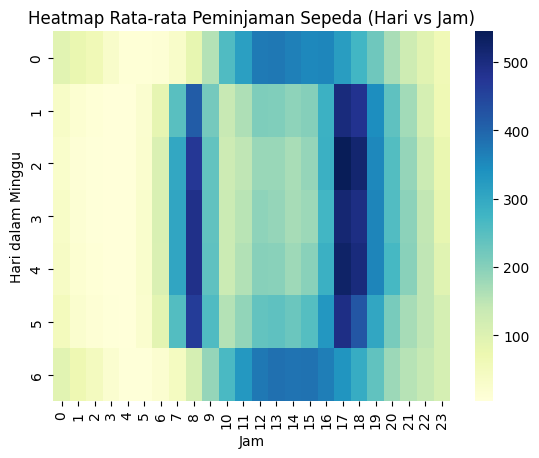

In [24]:
heatmap_data = merged_df.pivot_table(
    values='cnt_hour',
    index='weekday',
    columns='hr',
    aggfunc='mean'
)
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Heatmap Rata-rata Peminjaman Sepeda (Hari vs Jam)")
plt.xlabel("Jam")
plt.ylabel("Hari dalam Minggu")
plt.show()

**Penjelasan Sumbu:**
- Sumbu Y (vertikal): Hari dalam minggu, dari 0 sampai 6:

  - 0 = Minggu

  - 1 = Senin

  - ...

  - 6 = Sabtu

- Sumbu X (horizontal): Jam (0 sampai 23), mewakili waktu dalam satu hari.

**Insight dari Heatmap:**
1. Senin sampai Jumat (hari 1–5):

- Terdapat dua area gelap utama:

  - Sekitar jam 7–9 pagi → kemungkinan besar orang berangkat kerja/sekolah.

  - Sekitar jam 17–19 malam → waktu pulang kerja/sekolah.

- Ini konsisten dengan kebiasaan commuting di hari kerja.

2. Akhir pekan (Sabtu dan Minggu, hari 0 dan 6):

- Puncak peminjaman tidak terlalu terlihat di pagi hari.

- Aktivitas peminjaman menyebar lebih merata di jam 10 pagi hingga 17 sore, menunjukkan pemakaian lebih santai untuk rekreasi.

3. Jam 0–5 pagi dan setelah jam 21 malam:

- Hampir semua hari menunjukkan sangat sedikit peminjaman (warna sangat terang/pucat).

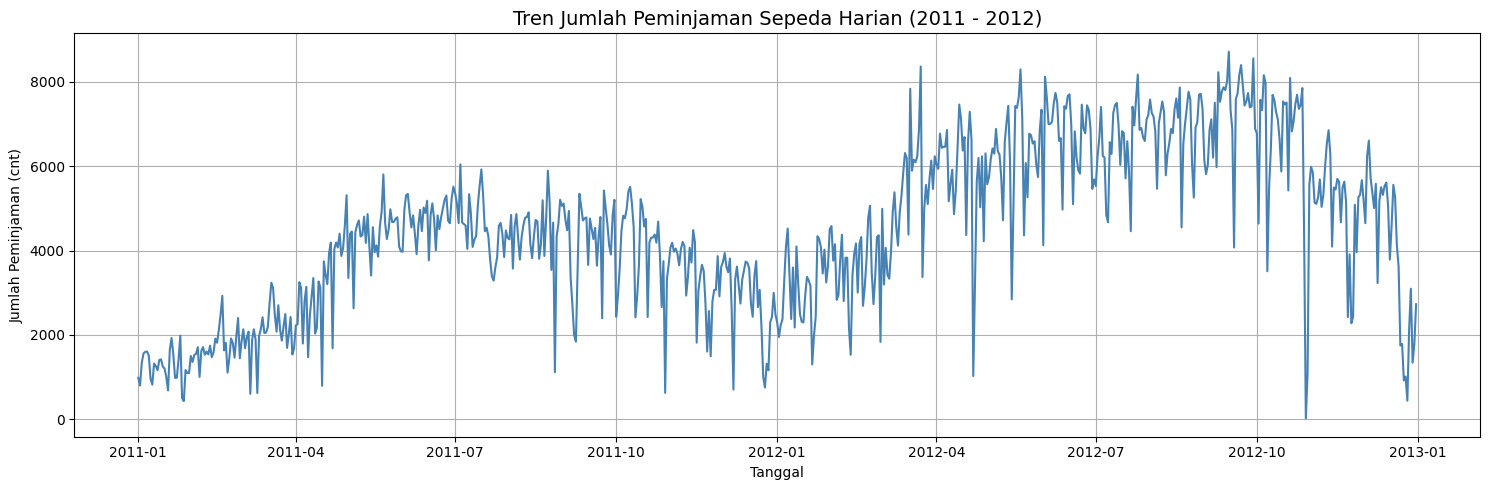

In [25]:
# Plot tren peminjaman per hari
plt.figure(figsize=(15, 5))
plt.plot(day_df['dteday'], day_df['cnt'], color='steelblue')
plt.title('Tren Jumlah Peminjaman Sepeda Harian (2011 - 2012)', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight dari Grafik:
1. Awal 2011:

- Jumlah peminjaman masih rendah, sekitar 1.000–2.000 unit per hari.

2. Pertengahan 2011 (sekitar Mei–Juli):

- Terjadi peningkatan signifikan hingga sekitar 5.000–6.000 unit.

- Bisa jadi karena mulai populernya layanan atau musim yang mendukung (musim semi ke musim panas).

3. Akhir 2011 - Awal 2012:

- Ada sedikit penurunan dan fluktuasi, mungkin karena faktor cuaca dingin (musim dingin).

4. Pertengahan hingga akhir 2012:

- Tren meningkat lagi, mencapai puncak lebih dari 8.000 unit per hari.

- Ini adalah periode tertinggi dalam dua tahun yang diamati.

5. Akhir 2012 (Desember):

- Terjadi penurunan tajam, kemungkinan karena musim dingin dan liburan akhir tahun.



<ipython-input-26-3782c564fb2d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peak_hour_df, x='hr', y='cnt_hour', palette='viridis')


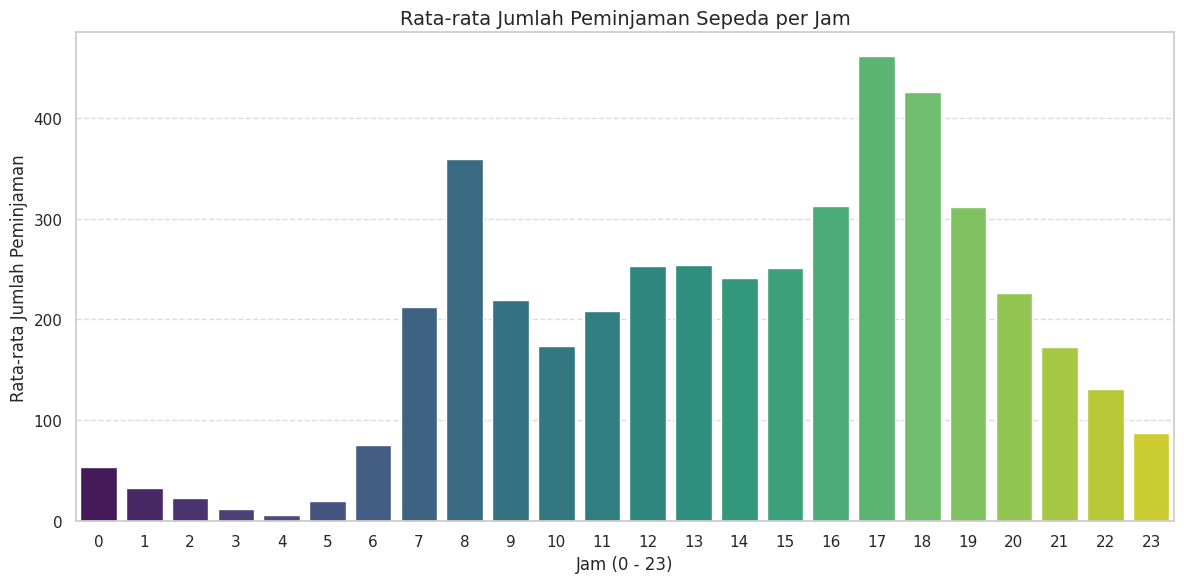

In [26]:
import seaborn as sns
# Set style seaborn
sns.set(style="whitegrid")

# Hitung rata-rata peminjaman per jam
peak_hour_df = merged_df.groupby('hr')['cnt_hour'].mean().reset_index()

# Visualisasikan waktu puncak peminjaman sepeda
plt.figure(figsize=(12, 6))
sns.barplot(data=peak_hour_df, x='hr', y='cnt_hour', palette='viridis')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam', fontsize=14)
plt.xlabel('Jam (0 - 23)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari visualisasi itu kamu bisa lihat waktu puncak (peak hours) peminjaman sepeda biasanya terjadi di:

Pagi hari sekitar jam 7–9

Sore hari sekitar jam 17–19

Ini masuk akal karena bertepatan dengan waktu orang berangkat dan pulang kerja/kuliah.

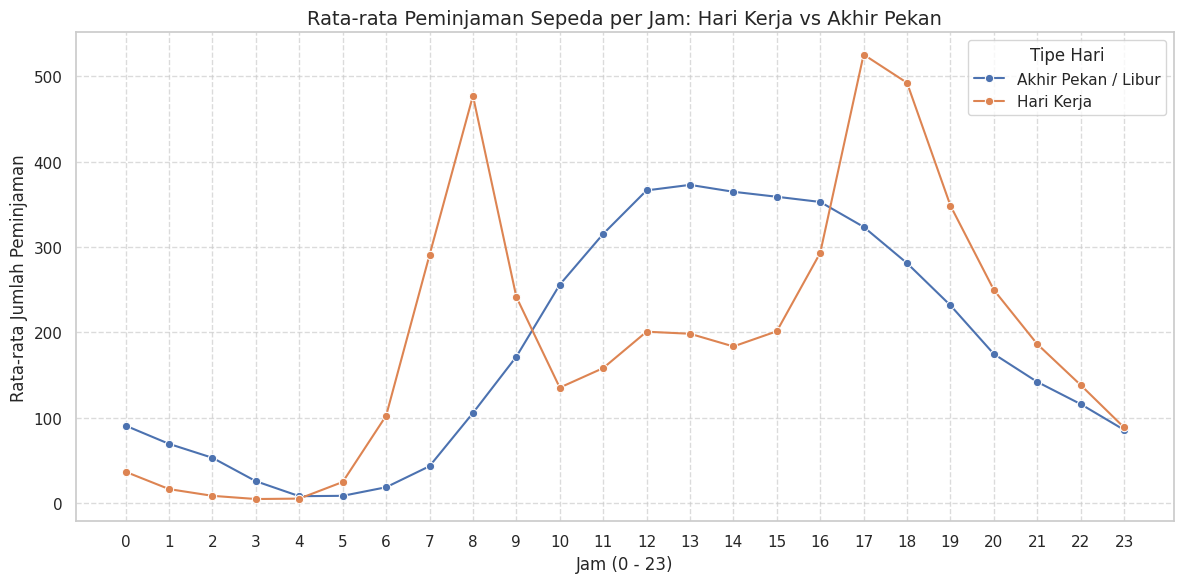

In [27]:
# Hitung rata-rata peminjaman per jam, dikelompokkan berdasarkan workingday
peak_hour_workingday = merged_df.groupby(['hr', 'workingday'])['cnt_hour'].mean().reset_index()

# Ubah nilai 0 dan 1 pada workingday jadi label
peak_hour_workingday['workingday'] = peak_hour_workingday['workingday'].map({0: 'Akhir Pekan / Libur', 1: 'Hari Kerja'})

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hour_workingday, x='hr', y='cnt_hour', hue='workingday', marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Jam: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Jam (0 - 23)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipe Hari')
plt.tight_layout()
plt.show()

**Hari Kerja (Oranye):**
- Terlihat dua puncak utama:

  - Sekitar jam 8 pagi → kemungkinan besar karena orang berangkat kerja atau sekolah.

  - Sekitar jam 5-6 sore → kemungkinan besar karena pulang kerja atau aktivitas sore.

- Jumlah peminjaman menurun drastis setelah pukul 18.00.

**Akhir Pekan / Libur (Biru):**
- Pola lebih stabil, tanpa lonjakan tajam seperti hari kerja.

- Peningkatan bertahap mulai jam 7 pagi, memuncak sekitar jam 12–14 siang.

- Aktivitas peminjaman lebih tinggi sepanjang siang hingga sore dibanding pagi.

##Kesimpulan

1. Pola Harian Berdasarkan Jenis Hari (Hari Kerja vs Akhir Pekan)
- Hari Kerja (weekday):

  - Terdapat dua puncak peminjaman utama: sekitar jam 08.00 dan 17.00.

  - Peminjaman sangat dipengaruhi oleh aktivitas commuting (berangkat & pulang kerja/sekolah).

- Akhir Pekan / Hari Libur:

  - Pola lebih merata dengan puncak di sekitar jam 12.00–14.00.

  - Cenderung digunakan untuk kegiatan rekreasi dan aktivitas santai.

2. Tren Jumlah Peminjaman Harian (2011–2012)
- Terdapat tren peningkatan signifikan dari awal 2011 hingga akhir 2012.

- Puncak penggunaan terjadi di pertengahan hingga akhir 2012 dengan lebih dari 8.000 peminjaman per hari.

- Ada fluktuasi musiman, dengan penurunan tajam di musim dingin (akhir tahun).

- Hal ini menunjukkan pertumbuhan popularitas layanan serta pengaruh cuaca/musim terhadap penggunaan.

3. Pola Peminjaman Berdasarkan Hari dan Jam (Heatmap)
- Senin–Jumat: Pola peminjaman membentuk "sandwich time" yaitu:

  - Puncak pagi (07.00–09.00) dan sore (17.00–19.00).

- Sabtu–Minggu:

  - Aktivitas tersebar lebih merata di jam 10.00–17.00, menunjukkan orientasi penggunaan yang lebih bebas dan tidak terikat jam kerja.

- Jam malam dan dini hari (00.00–05.00): Sangat minim peminjaman di semua hari.

In [29]:
merged_df.to_csv("all_data.csv", index=False)